In [9]:
# lineer cebir işlemleri için numpy kütüphanesini içe aktarır.
import numpy as np

# veri işleme ve analiz için pandas kütüphanesini içe aktarır.
import pandas as pd

# dosya ve dizin işlemleri için os kütüphanesini içe aktarır.
import os

# veri görselleştirme için matplotlib.pyplot kütüphanesini içe aktarır.
import matplotlib.pyplot as plt

# istatistiksel veri görselleştirme için seaborn kütüphanesini içe aktarır.
import seaborn as sns

# kategorik hedef değişkenleri sayısal etiketlere dönüştürmek için LabelEncoder sınıfını sklearn.preprocessing modülünden içe aktarır.
from sklearn.preprocessing import LabelEncoder

# veriyi eğitim ve test kümelerine ayırmak için train_test_split fonksiyonunu
from sklearn.model_selection import train_test_split

# dengesiz sınıf dağılımına sahip veriler için SMOTE (Synthetic Minority Oversampling Technique) tekniğini kullanmak için SMOTE sınıfını imblearn.over_sampling modülünden içe aktarır.
from imblearn.over_sampling import SMOTE

# veri ölçeklendirme için QuantileTransformer sınıfını sklearn.preprocessing modülünden içe aktarır.
from sklearn.preprocessing import QuantileTransformer

# model performansını değerlendirmek için çeşitli metrikleri (accuracy_score, precision_score, recall_score, f1_score) sklearn.metrics modülünden içe aktarır.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [10]:
# CNN modelini oluşturmak ve eğitmek için gerekli kütüphaneleri içe aktarma.

# TensorFlow modellerini oluşturmak ve çalıştırmak için ana kütüphane.
import tensorflow as tf
from tensorflow import keras

# TensorFlow üzerine inşa edilmiş ve sinir ağlarını oluşturmak ve eğitmek için daha basit bir arayüz sağlayan üst düzey bir API.
from keras import layers, Sequential

# Bu bölüm, CNN mimarisini oluşturmak için yapı taşlarını içe aktarır:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten

from keras.initializers import GlorotUniform, HeUniform, HeNormal
# Model: Çoklu giriş ve çıkışa sahip karmaşık modelleri tanımlamak için daha esnek bir yol.
# Input: Modelin giriş katmanını tanımlar.
# Dense: Sınıflandırma için tamamen bağlı katmanlar oluşturur.
# Conv2D: Görüntü gibi 2D verilerden özellik çıkarmak için konvolüsyonel filtreler uygular.
# MaxPooling2D: Özellik haritalarının boyutunu azaltmak için maksimum havuzlama gerçekleştirir.
# Flatten: 2D özellik haritalarını yoğun katmanlara beslemek için 1D vektör haline getirir.
# GlorotUniform, HeUniform ve HeNormal: Katmanların ağırlıkları için farklı başlatma yöntemleri.

# Bu kısım, eğitim sürecini özelleştirmek için işlevleri içe aktarır:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
# EarlyStopping: Doğrulama kaybını izler ve belirli sayıda epoch boyunca iyileşmezse eğitimi durdurur, aşırı uyumu önler.
# ReduceLROnPlateau: Doğrulama kaybı duraklarsa öğrenme oranını azaltır, potansiyel olarak modelin yerel minimumlardan kaçmasına ve daha iyi çözümler bulmasına yardımcı olur.

In [11]:
# tab2img adlı bir kütüphaneyi indirir. Bu kütüphane, tablo verilerini CNN'lerde kullanılabilecek görüntülere dönüştürmek için kullanılır.

from tab2img.converter import Tab2Img
# pip install tab2img -q komutunu çalıştırmak, kütüphanenin sessizce kurulmasını sağlar. Bu, indirme ilerlemesi veya diğer ayrıntıları dizüstü bilgisayardan çıktıda görmeyeceğiniz anlamına gelir.

# tab2img.converter.Tab2Img sınıfını kullanarak tablo verilerini görüntülere dönüştürebilirsiniz. Bu sınıf, verilerinizi CNN modellerinde kullanmak üzere uygun bir formata dönüştürmenizi sağlar.

In [12]:
# makine öğrenimi deneylerinde tekrarlanabilirliği sağlamak için çeşitli kütüphanelerin rastgele sayı üreteçlerinin başlangıç değerlerini (seed) ayarlar.

# pi sayısının yaklaşık değeri olan 314159'u seed_pi adlı sabit bir değişkene atar. Bu değer, sonraki adımlarda rastgelelik için başlangıç değeri olarak kullanılacaktır.
seed_pi = 314159

# Bu satır, NumPy kütüphanesinin rastgele sayı üretecinin başlangıç değerini ayarlar. NumPy, bilimsel hesaplama için temel bir kütüphanedir ve genellikle veri işleme için kullanılır. Başlangıç değerini ayarlayarak, kodunuzu her çalıştırdığınızda aynı rastgele sayıların üretilmesini sağlarsınız, bu da tutarlı sonuçlara yol açar.
np.random.seed(seed_pi)

# Benzer şekilde, bu satır TensorFlow'un rastgele sayı üretecinin başlangıç değerini ayarlar. TensorFlow, makine öğrenimi modelleri oluşturmak ve eğitmek için popüler bir çerçevedir. Başlangıç değerini ayarlayarak, modelin eğitim sürecinin farklı çalıştırmalar arasında tekrarlanabilir ve tutarlı olmasını sağlarsınız.
tf.random.set_seed(seed_pi)

In [13]:
# Datasetleri dataframelerin içine gömme.

df_data_1 = pd.read_parquet('data/Benign-Monday-no-metadata.parquet')
df_data_2 = pd.read_parquet('data/Botnet-Friday-no-metadata.parquet')
df_data_3 = pd.read_parquet('data/Bruteforce-Tuesday-no-metadata.parquet')
df_data_4 = pd.read_parquet('data/DDoS-Friday-no-metadata.parquet')
df_data_5 = pd.read_parquet('data/DoS-Wednesday-no-metadata.parquet')
df_data_6 = pd.read_parquet('data/Infiltration-Thursday-no-metadata.parquet')
df_data_7 = pd.read_parquet('data/Portscan-Friday-no-metadata.parquet')
df_data_8 = pd.read_parquet('data/WebAttacks-Thursday-no-metadata.parquet')
df_data_1.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6,4,2,0,12,0,6,6,6.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1,6,1,2,0,12,0,6,6,6.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
2,6,3,2,0,12,0,6,6,6.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
3,6,1,2,0,12,0,6,6,6.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4,6,609,7,4,484,414,233,0,69.14286,111.967896,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign


In [14]:
# df_data_1, df_data_2, ..., df_data_8 adlı birden fazla veri çerçevesini tek bir veri çerçevesinde (df_data) birleştirir.

df_data = pd.concat([df_data_1, df_data_2, df_data_3, df_data_4, 
                     df_data_5, df_data_6, df_data_7, df_data_8], axis=0, ignore_index=True)

In [15]:
# Data ön işlemesi

# df_data veri çerçevesinde veri ön işleme işlemleri gerçekleştirir:
null_counts = df_data.isnull().sum()

# df_data.isnull().sum() kullanarak her sütundaki boş değerlerin sayısını sayar. df_data.dropna(inplace=True) kullanarak boş değer içeren tüm satırları düşürür.
print(f"{null_counts.sum()} veri setinde boş girişler var!\n")

# df_data.duplicated().sum() kullanarak yinelenen satırların sayısını sayar. df_data.drop_duplicates(inplace=True) kullanarak tüm yinelenen satırları kaldırır.
df_data.dropna(inplace=True)

# Satırları kaldırdıktan sonra, orijinal endeksler sırasız hale gelebilir. endeksleri df_data.reset_index(drop=True, inplace=True) kullanarak sürekli bir sıraya sıfırlar.
duplicate_count = df_data.duplicated().sum()

# tekrar eden verileri yazdırır
print(f"{duplicate_count} veri setinde tekrar eden girişler var!\n")

# tekrarları siler
df_data.drop_duplicates(inplace=True)  # bunun yerine df_data = df_data.drop_duplicates() kullanılabilir

# mesaj yazdırır
print(f"Kopyalar Kaldırıldı!\n")

# işaretleri resetler
df_data.reset_index(drop=True, inplace=True)

# Kategorik sütunlar için veri kümesini inceler
print("Kategori kolonları:",df_data.select_dtypes(include=['object']).columns.tolist(),'\n')

# İlk 5 satırı yazdır
df_data.head()

0 veri setinde boş girişler var!

82004 veri setinde tekrar eden girişler var!

Kopyalar Kaldırıldı!

Kategori kolonları: ['Label'] 



,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6,4,2,0,12,0,6,6,6.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1,6,1,2,0,12,0,6,6,6.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
2,6,3,2,0,12,0,6,6,6.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
3,6,1,2,0,12,0,6,6,6.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4,6,609,7,4,484,414,233,0,69.14286,111.967896,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign


In [16]:
# 1.2.2 - Hedef Özelliğin İncelenmesi

# veri çerçevesinin satır ve sütun sayısını yazdırır. Bu, veri çerçevesinin boyutunu ve genel yapısını anlamaya yardımcı olur.
print('Dataframe Şekli: ',df_data.shape,'\n')
print('Hedef Özellik İnceleme - y:\n')

# "Label" adlı hedef özelliğinin değerlerinin sıklığını sayar ve yazdırır. Bu, hangi değerlerin daha yaygın olduğunu ve hedef değişkenin dağılımını görselleştirmeye yardımcı olur.
df_data.Label.value_counts()

Dataframe Şekli:  (2231806, 78) 

Hedef Özellik İnceleme - y:



Label
Benign                        1895314
DoS Hulk                       172846
DDoS                           128014
DoS GoldenEye                   10286
FTP-Patator                      5931
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
PortScan                         1956
Web Attack � Brute Force         1470
Bot                              1437
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [17]:
# df_data veri çerçevesini ikili sınıflandırma için hazırlar:

# df_data.copy() ile veri çerçevesinin bir kopyası oluşturulur.
X = df_data.copy()

# kopyadan 'Label' sütununu (hedef sütunu) kaldırır.
X = X.drop('Label', axis=1)

# 'Label' sütununun kopyası alınır.
y = df_data['Label'].copy()

# 'Benign' etiketli veriler 0 ile, geri kalanlar ise 1 ile eşleştirilir. varsayılan olarak 1 olarak doldurulur.
y = y.map({'Benign': 0}).fillna(1)

C:\Users\abdulkadir\AppData\Local\Temp\ipykernel_22348\4084445953.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='Blues')


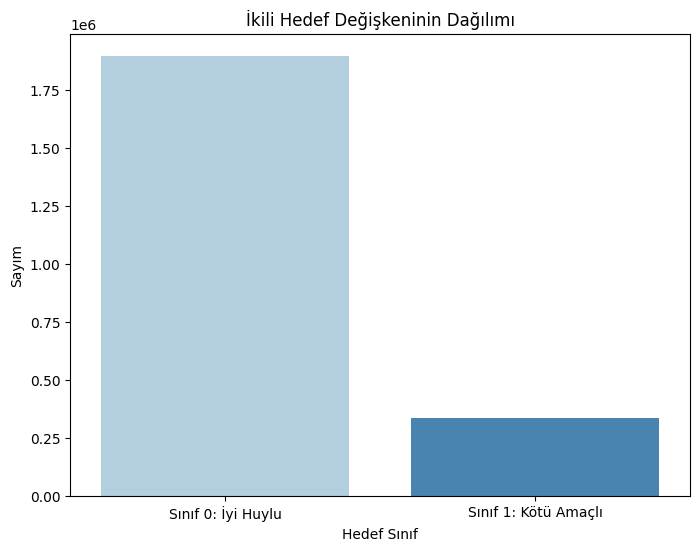

Sınıf 0: 84.92%
Sınıf 1: 15.08%


In [18]:
# 8 inç genişliğinde ve 6 inç yüksekliğinde bir grafik oluşturur.
plt.figure(figsize=(8, 6))

# y değişkeninin değerlerini sayar ve yeşil tonlarında bir histogram çizer.
sns.countplot(x=y, palette='Blues')

# grafiğe başlık ekler.
plt.title('İkili Hedef Değişkeninin Dağılımı')

# eksenlerin isimlerini belirler.
plt.xlabel('Hedef Sınıf')
plt.ylabel('Sayım')

# x ekseninin etiketlerini ayarlar.
plt.xticks(ticks=[0, 1], labels=['Sınıf 0: İyi Huylu', 'Sınıf 1: Kötü Amaçlı'])

# grafiği görüntüler.
plt.show()

# her sınıfın (0 ve 1) kaç örneğe sahip olduğunu sayar.
class_counts = y.value_counts()

# her sınıfın toplamdaki oranını hesaplar.
class_ratios = class_counts / len(y)

# her sınıfın oranını yüzde olarak yazdırır.
print(f"Sınıf 0: {class_ratios[0]*100:.2f}%")
print(f"Sınıf 1: {class_ratios[1]*100:.2f}%")

In [19]:
def extractAllSets(X,y,p_train,p_val,p_test,random_state=seed_pi,shuffle=True):
# extractAllSets adlı bir fonksiyon tanımlar. Bu fonksiyon, bir pandas veri çerçevesi X (özellikler) ve bir pandas serisi y (hedef) alır ve bunları eğitim, doğrulama ve test olmak üzere üç alt kümeye ayırır. Hedef serisini de buna göre y_train, y_val ve y_test olarak ayırır.
    #İlk train_test_split çağrısı veriyi iki kümeye ayırır:

    #X_train ve y_train eğitim seti, verinin p_train yüzdesini içerir.
    #X_temp ve y_temp kalan veri, daha sonra doğrulama ve test setlerine ayrılacaktır.
    #stratify=y parametresi, eğitim setinin orijinal veriyle aynı sınıf dağılımını korumasını sağlar. Bu, dengesiz sınıflar içeren veri kümeleri için önemlidir.
    X_train, X_temp, y_train, y_temp = train_test_split(X,y, stratify=y, 
        test_size=(1.0 - p_train), random_state=random_state, shuffle=shuffle)
                                                                        # Enable/desable shuffling
    # İkinci train_test_split çağrısı X_temp ve y_temp'i doğrulama ve test setlerine ayırır:

    #X_val ve y_val doğrulama seti, kalan verinin p_val yüzdesini içerir.
    #X_test ve y_test test seti, kalan verinin p_test yüzdesini içerir.
    #stratify=y_temp parametresi, doğrulama ve test setlerinin de orijinal veriyle aynı sınıf dağılımını korumasını sağlar.
    
    # fraction değişkeni, p_test'in p_val ve p_test toplamına oranı olarak hesaplanır. Bu, doğrulama ve test setlerinin birbirine göre belirtilen oranlara sahip olmasını sağlar.
    fraction = p_test / (p_val + p_test)
    X_val, X_test, y_val, y_test = train_test_split(X_temp,y_temp,stratify=y_temp,
        test_size=fraction, random_state=random_state, shuffle=shuffle) # Enable/desable shuffling
    # Tekrarlanabilirliği sağlamak için her iki train_test_split çağrısı için aynı random_state kullanılır. Bu, aynı parametrelerle fonksiyonu birden fazla çalıştırırsanız aynı bölümleri alacağınız anlamına gelir.

# Fonksiyon altı değer döndürür:

# X_train: Eğitim seti özellikleri
# X_val: Doğrulama seti özellikleri
# X_test: Test seti özellikleri
# y_train: Eğitim seti hedef değerleri
# y_val: doğrulama seti hedef değerleri
# y_test: test seti hedef değerleri  
    return X_train, X_val, X_test, y_train, y_val, y_test

In [20]:
# extractAllSets verilerinizden eğitim, doğrulama ve test setlerini belirli oranlarda ayırmak için kullanılır.
# X (özellikler) ve y (hedefler) adlı iki parametre alır.
# eğitim, doğrulama ve test setleri için istenen oranları belirleyen üç float parametre de alır.
# bu oranlara göre ayrılan setleri X_train, X_val, X_test, y_train, y_val ve y_test adlı değişkenlere atar ve geri döndürür.
X_train, X_val, X_test, y_train, y_val, y_test = extractAllSets(X, y, 0.75, 0.10, 0.15)

# original_data adlı bir listede ayıklanan setler organize edilir.
# eğitim, doğrulama ve test setlerini hem özellikler hem de hedef değerler için içerir.
original_data = [X_train, X_val, X_test, y_train, y_val, y_test]

In [21]:
# SMOTE (Synthetic Minority Oversampling Technique) adlı bir örnekleme tekniğini kullanarak az sayıda örneğe sahip azınlık sınıfını aşırı örnekleme (oversample) yapmak için kullanılır. özellikle sınıf dengesizliği olan veri kümelerinde faydalıdır.

# SMOTE nesnesi oluşturur.
# sampling_strategy = 0.5 azınlık sınıfının çoğunluk sınıfına eşit sayıda örneğe ulaşana kadar aşırı örnekleme yapılacağını belirtir.
# random_state=seed_pi rastgelelik için bir başlangıç değeri ayarlar.
smote = SMOTE (sampling_strategy = 0.5, random_state=seed_pi)
X_train, y_train = smote.fit_resample (X_train, y_train)
# SMOTE nesnesini kullanarak eğitim setindeki azınlık sınıfını aşırı örnekleme yapar.
# X_train ve y_train değişkenleri, aşırı örneklemeden sonra güncellenmiş eğitim seti verilerini ve hedef değerlerini içerir.

In [22]:
# Veri Ölçekleme

# QuantileTransformer'ı tekdüze dağılımla başlatır
quantile_transformer = QuantileTransformer(n_quantiles=10**4, output_distribution='uniform')

# Eğitim verilerini sığdırın ve dönüştürür
X_train_transformed = quantile_transformer.fit_transform(X_train)

# Aynı dönüştürücüyü kullanarak doğrulama ve test verilerini dönüştürür
X_val_transformed  = quantile_transformer.transform(X_val)
X_test_transformed = quantile_transformer.transform(X_test)

# Dönüştürülmüş verileri liste olarak düzenler
scaled_data = [X_train_transformed, X_val_transformed, X_test_transformed, y_train, y_val, y_test]

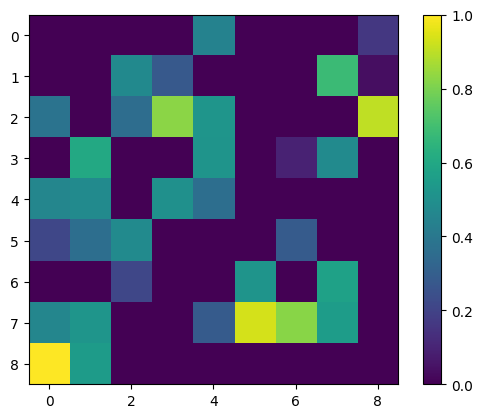

In [23]:
# gri tonlamalı görüntülere dönüştürme

# Define the Tab2Img model
model_tab2img = Tab2Img()

# verideki her örnek bir (9x9) numpy dizisi haline gelir.
# Eğitim verilerini dönüştürürr
X_train_images = model_tab2img.fit_transform(X_train_transformed, y_train.values)

# Doğrulama ve test verilerini dönüştürür (uygun modeli kullanarak)
X_val_images  = model_tab2img.transform(X_val_transformed)
X_test_images = model_tab2img.transform(X_test_transformed)

# verideki her dizi (9x9x1) gri tonlamalı bir görüntü haline gelir.
# Gri Tonlama Dönüşümü - CNN girişi için görüntü verilerini yeniden şekillendirir
X_train_images = X_train_images.reshape(-1, 9, 9, 1)
X_val_images   = X_val_images.reshape(  -1, 9, 9, 1)
X_test_images  = X_test_images.reshape( -1, 9, 9, 1)

# Bir örneği görselleştirir
plt.imshow(X_train_images[0])
plt.colorbar()
plt.show()

In [24]:
# model_0 adında bir derin öğrenme modelinin mimarisini tanımlar. görüntü sınıflandırma görevleri için tasarlanmıştır.

# Başlatıcıları tanımlar

conv_initializer   = HeNormal(seed=seed_pi)
# HeNormal başlatıcısını tanımlar. Bu başlatıcı, ağırlıkları normal dağılımdan rastgele çeker ve He normalizasyonu uygular. Özellikle derin ağlarda ağırlıkların patlama sorununu önlemeye yardımcı olur.

dense_initializer  = HeUniform(seed=seed_pi)
# HeUniform başlatıcısını tanımlar. ağırlıkları tekdüze dağılımdan rastgele çeker ve He normalizasyonu uygular. Bu da derin ağlarda ağırlık patlamasını önlemeye yardımcı olur.

output_initializer = GlorotUniform(seed=seed_pi)
# GlorotUniform başlatıcısını tanımlar. Bu başlatıcı, ağırlıkları tekdüze dağılımdan rastgele çeker ve Glorot normalizasyonu uygular. çıkış katmanında ağırlık patlamasını önlemeye yardımcı olur.

model_0 = Sequential([
    Input(shape=(9, 9, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer=conv_initializer),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation = 'relu', kernel_initializer = dense_initializer),
    Dense(1, activation = 'sigmoid', kernel_initializer = output_initializer)])
# Sequential modelini kullanarak model_0 adında bir model oluşturur.
# Input(shape=(9, 9, 1)): modelin girişini tanımlar. Giriş, 9x9 boyutunda ve tek kanallı (gri tonlama) bir görüntüdür.
# Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer=conv_initializer): 3x3 boyutunda çekir kullanan bir 2D konvülisyon katmanıdır. Katman 32 adet filtre öğrenir ve ReLU aktivasyon fonksiyonunu kullanır. Ağırlıklar conv_initializer ile başlatılır.
# MaxPooling2D(pool_size=(2, 2)): 2x2 boyutunda bir havuzlama katmanıdır. Katman, girdiden 2x2 boyutunda bloklar alarak maksimum değeri seçer ve bu şekilde boyut küçültme yapar.
# Flatten(): 2D verisini tek boyutlu bir vektöre dönüştürür.
# Dense(128, activation = 'relu', kernel_initializer = dense_initializer): 128 nöronlu bir yoğun katmandır. Katman ReLU aktivasyon fonksiyonunu kullanır ve ağırlıklar dense_initializer ile başlatılır.
# Dense(1, activation = 'sigmoid', kernel_initializer = output_initializer): çıkış katmanıdır. Katman 1 adet nöron içerir ve sigmoid aktivasyon fonksiyonunu kullanır. Ağırlıklar output_initializer ile başlatılır.
# model_0.summary()

# modelin mimarisini özetleyen bir tablo yazdırır. her katmanın adını, giriş ve çıkış boyutlarını, aktivasyon fonksiyonunu ve kullanılan başlatıcıyı gösterir. modelin yapısını ve karmaşıklığını anlamaya yardımcı olur.
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 7, 7, 32)       │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,441 (146.25 KB)

 Trainable params: 37,441 (146.25 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# model_0 modelini eğitimi için kullanılan öğrenme oranını ve derleme ayarlarını tanımlar.

# ReduceLROnPlateau zamanlayıcısını tanımlar, LR:Öğrenme Oranı
reduce_lr = ReduceLROnPlateau( 
    monitor='val_accuracy',    # Doğrulama doğruluğunu izler
    patience= 5,               # patient için varsayılan değer 10'dur
    min_lr= 1e-07,             # min_lr: Minimum öğrenme oranı (varsayılan değer=0.0001)
    verbose=1,                 # Öğrenme oranı düşürüldüğünde ayrıntılı çıktı sağlar
    factor= 0.1)               # Varsayılan faktör 0,1'dir, bu da 
                               # tetiklendiğinde öğrenme oranını %10 artırır.

# Modeli Adam optimizer, ikili çapraz entropi kaybı ve doğruluk metrikleriyle derler
model_0.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
# model_0 modelini fit yöntemi kullanarak eğitir.
# X_train_images: Eğitim veri özellikleri (görüntüler).
# y_train: Eğitim veri hedef değerleri (etiketler).
# validation_data=(X_val_images, y_val): Eğitim sırasında performansı izlemek için doğrulama veriyi belirtir.
# epochs=50: Tüm eğitim verisi üzerinde kaç kez yineleyeceğini belirtir.
# batch_size=1024: Her yinelemede (epoch) işlenecek örnek sayısını belirtir.
# callbacks=[reduce_lr]: Eğitim sırasında çağrılacak geri çağırma fonksiyonlarının bir listesidir. Bu durumda, yalnızca reduce_lr geri çağırma fonksiyonu kullanılır.
history_0  = model_0.fit(X_train_images, y_train, validation_data=(X_val_images, y_val), epochs=50, 
    batch_size=1024, callbacks=[reduce_lr])
# validation_data: eğitim sırasında modelin performansını değerlendirmek için ayrı bir veri kümesi (görüntüler ve etiketler) sağlar.modelin eğitim verisine aşırı uymasını önlemeye yardımcı olur.
# epochs: Mmodelin tüm eğitim verisi üzerinde kaç kez yineleyeceğini belirtir. Her yinelemeye bir epoch denir.
# batch_size: her yinelemede işlenen örnek sayısını tanımlar. Daha küçük batch boyutları daha sık güncellemeler ve potansiyel olarak daha iyi bir yakınsama sağlayabilirken, daha büyük batch boyutları verimliliği artırabilir.
# callbacks: Eğitim sırasında belirli noktalarda çağrılacak işlevleri tanımlamanıza olanak tanır. Bu durumda, doğrulama performansına göre öğrenme oranını otomatik olarak ayarlamak için reduce_lr geri çağırma fonksiyonu kullanılır.

# history_0: eğitim geçmişini depolar. her epoch boyunca modelin hem eğitim hem de doğrulama setlerindeki performansı hakkında bilgi içerir.

Epoch 1/50
2083/2083 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9683 - loss: 0.0934 - val_accuracy: 0.9933 - val_loss: 0.0237 - learning_rate: 0.0010
Epoch 2/50
2083/2083 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9936 - loss: 0.0206 - val_accuracy: 0.9951 - val_loss: 0.0179 - learning_rate: 0.0010
Epoch 3/50
2083/2083 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9951 - loss: 0.0162 - val_accuracy: 0.9957 - val_loss: 0.0141 - learning_rate: 0.0010
Epoch 4/50
2083/2083 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9957 - loss: 0.0140 - val_accuracy: 0.9963 - val_loss: 0.0117 - learning_rate: 0.0010
Epoch 5/50
2083/2083 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9961 - loss: 0.0126 - val_accuracy: 0.9970 - val_loss: 0.0099 - learning_rate: 0.0010
Epoch 6/50
2083/2083 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9963 - loss: 0.0116 - val_accuracy: 0.9974 - val_loss: 0.0085 - learning_rate: 0.0010
Epoch 7/50
2083/2083 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9

In [27]:
# Geçmişten eğitim ve doğrulama kayıplarını/doğruluklarını çıkarır

# test_loss, test_accuracy = model_0.evaluate(X_test_images, y_test)
#model_0 modelini test kümesi üzerinde değerlendirir ve kaybı (test_loss) ve doğruluğu (test_accuracy) hesaplar.
test_loss, test_accuracy = model_0.evaluate(X_test_images, y_test)

#model_0 modelini kullanarak test kümesi görüntüleri için tahminler oluşturur.
# y_pred: Modelin tahmin ettiği olasılıkları içeren bir NumPy dizisi.

# y_pred_labels: Tahmin edilen sınıf etiketlerini içeren bir NumPy dizisi.
# X_test_images: Değerlendirme için kullanılacak test kümesi görüntüleri.
# y_test: Değerlendirme için kullanılacak test kümesi hedef değerleri (etiketler).
# Test kümesi üzerinde tahminlerde bulnur
y_pred = model_0.predict(X_test_images)

# # Modelin tahmin ettiği olasılıkları 0 veya 1 değerlerine dönüştürerek sınıf etiketlerine dönüştürür.
y_pred_labels = (y_pred > 0.5).astype(int)

# #tahmin edilen sınıf etiketleri ve gerçek sınıf etiketleri için hassasiyeti (precision) hesaplar.
# precision: Hassasiyet skorunu içeren bir skaler değer.
# tahmin edilen sınıf etiketleri ve gerçek sınıf etiketleri için geri çağırmayı (recall) hesaplar.
# recall: Geri çağırma skorunu içeren bir skaler değer.
#  Tahmin edilen sınıf etiketleri ve gerçek sınıf etiketleri için F1 skorunu hesaplar.
# f1: F1 skorunu içeren bir skaler değer.
precision = precision_score(y_test, y_pred_labels)
recall    = recall_score(y_test, y_pred_labels)
f1        = f1_score(y_test, y_pred_labels)

# test kümesi üzerindeki kaybı yazdırır.
print(f"Test Kaybı:      {test_loss:.4f}")

# test kümesi üzerindeki doğruluğu yüzdesel olarak yazdırır
print(f"Test Doğruluk:  {test_accuracy*100:.2f}%")

# üzerindeki hassasiyeti yüzdesel olarak yazdırır.
print(f"Test Hassasiyet: {precision*100:.2f}%")

#geri çağırmayı yüzdesel olarak yazdırır.
print(f"Test Geri Çağırma:    {recall*100:.2f}%")

# F1 skorunu yüzdesel olarak yazdırır.
print(f"Test F1 Skor:  {f1*100:.2f}%")


10462/10462 ━━━━━━━━━━━━━━━━━━━━ 10s 911us/step - accuracy: 0.9980 - loss: 0.0054
10462/10462 ━━━━━━━━━━━━━━━━━━━━ 10s 964us/step
Test Kaybı:      0.0057
Test Doğruluk:  99.80%
Test Hassasiyet: 99.11%
Test Geri Çağırma:    99.56%
Test F1 Skor:  99.34%


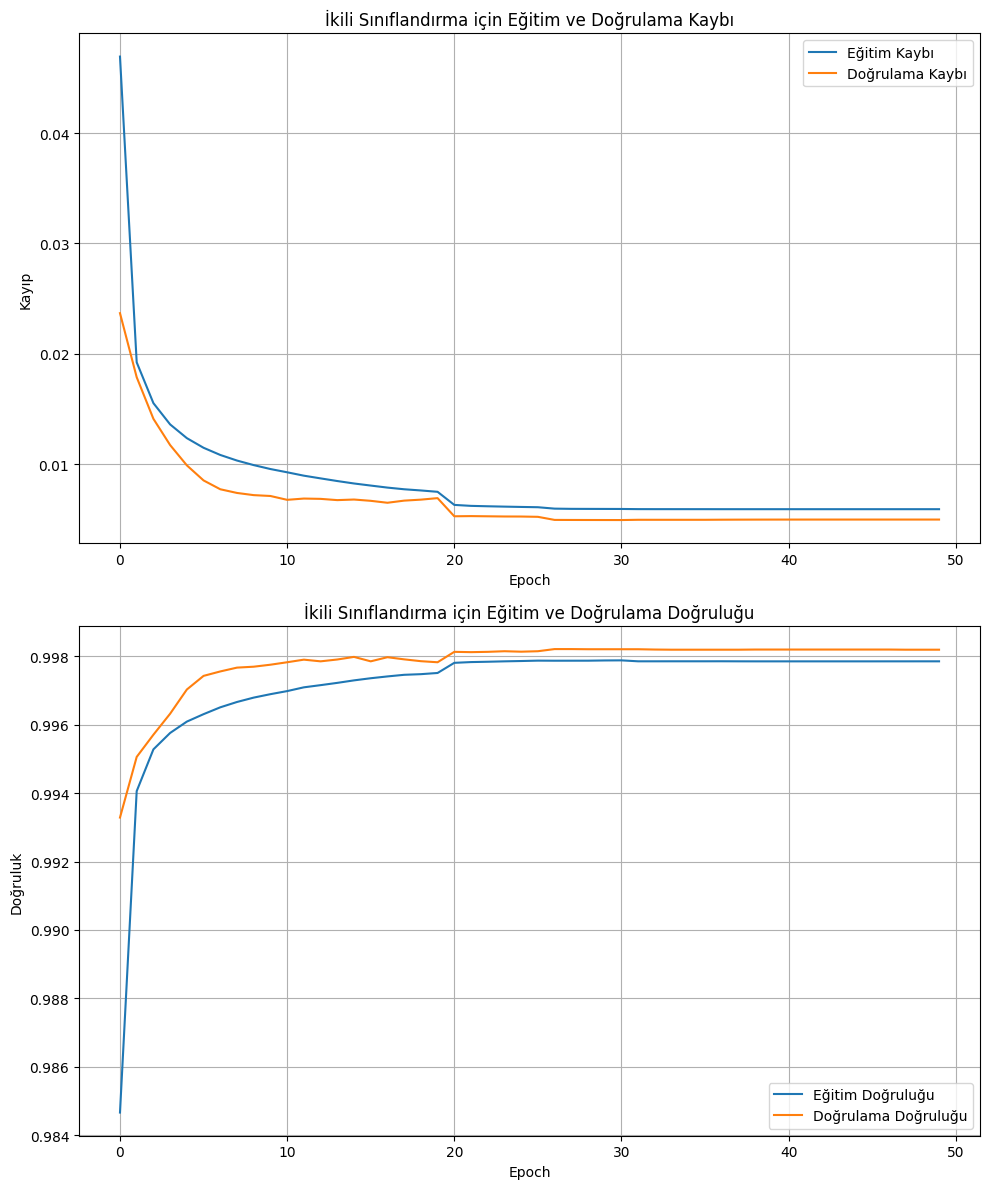

In [28]:
# model_0 modelinin eğitim ve doğrulama kümelerindeki kayıp ve doğruluk eğrilerini çizer. Bu eğriler, modelin eğitim süreci boyunca nasıl performans gösterdiğini görselleştirmeye yardımcı olur.

# eğitim kümesi için kayıp değerlerini history_0 değişkeninden alır.
train_loss = history_0.history['loss']

# doğrulama kümesi için kayıp değerlerini history_0 değişkeninden alır.
val_loss   = history_0.history['val_loss']

# eğitim kümesi için doğruluk değerlerini history_0 değişkeninden alır.
train_acc  = history_0.history['accuracy']

# doğrulama kümesi için doğruluk değerlerini history_0 değişkeninden alır.
val_acc    = history_0.history['val_accuracy']

#  bir figür ve her biri bir eksen içeren bir alt grafik dizisi oluşturur.
# Grafik boyutu 10 inç x 12 inç.
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# eğitim kümesi için kayıp değerlerini epoch numaralarına göre ax1 eksenine çizer ve "Eğitim Kaybı" etiketini ekler.
ax1.plot(range(len(train_loss)), train_loss, label='Eğitim Kaybı')

#doğrulama kümesi için kayıp değerlerini epoch numaralarına göre ax1 eksenine çizer ve "Doğrulama Kaybı" etiketini ekler.
ax1.plot(range(len(val_loss)),   val_loss,   label='Doğrulama Kaybı')

# x ekseninin etiketini "Epoch" olarak ayarlar.
ax1.set_xlabel('Epoch')

# y ekseninin etiketini "Kayıp" olarak ayarlar.
ax1.set_ylabel('Kayıp')

#grafiğin başlığını "İkili Sınıflandırma için Eğitim ve Doğrulama Kaybı" olarak ayarlar.
ax1.set_title('İkili Sınıflandırma için Eğitim ve Doğrulama Kaybı')

# grafiğe kılavuz çizgileri ekler.
ax1.legend()
ax1.grid(True)

# Eğitim kümesi için doğruluk değerlerini epoch numaralarına göre ax2 eksenine çizer ve "Eğitim Doğruluğu" etiketini ekler.
ax2.plot(range(len(train_acc)), train_acc, label='Eğitim Doğruluğu')
ax2.plot(range(len(val_acc)),   val_acc,   label='Doğrulama Doğruluğu')

# x ekseninin etiketi "Epoch"
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Doğruluk')
ax2.set_title('İkili Sınıflandırma için Eğitim ve Doğrulama Doğruluğu')
ax2.legend()
ax2.grid(True)

# layout'u ayarlar
plt.tight_layout()

# plot'u göstgerir
plt.show()

In [29]:
# Çoklu sınıf yapılandırmasını ayarlama

# orijinal veri kümesinden (df_data) bir kopya (X) oluştur
X = df_data.copy()

#Label sütununu yani df_data'nın hedef sütunu kopyadan kaldırır.
# modelin eğitim sırasında hedef sütununa erişmemesini sağlar.
X = df_data.drop('Label', axis=1)

# orijinal veri kümesinden Label hedef değerlerini ayrı bir değişkene kopyalar.
y = df_data['Label']

# Etiketleri sayısal değerlere dönüştürmek için bir LabelEncoder nesnesi oluşturur.
label_encoder = LabelEncoder()

# label_encoder nesnesini kullanarak hedef değerleri sayısal değerlere dönüştürür.
y_encoded = label_encoder.fit_transform(y)

# dönüştürülen hedef değerleri bir pd.Series nesnesine aktarır.
y = pd.Series(y_encoded)

# Kodlamayı denetle
print('Çok Sınıflı Yapılandırma altında Hedef Özelliğin İncelenmesi - y:\n')

# hedef değerleri y'yi özetler
y.value_counts()

Çok Sınıflı Yapılandırma altında Hedef Özelliğin İncelenmesi - y:



0     1895314
4      172846
2      128014
3       10286
7        5931
6        5385
5        5228
11       3219
10       1956
12       1470
1        1437
14        652
9          36
13         21
8          11
Name: count, dtype: int64

C:\Users\abdulkadir\AppData\Local\Temp\ipykernel_22348\1441108514.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y, palette='Paired')


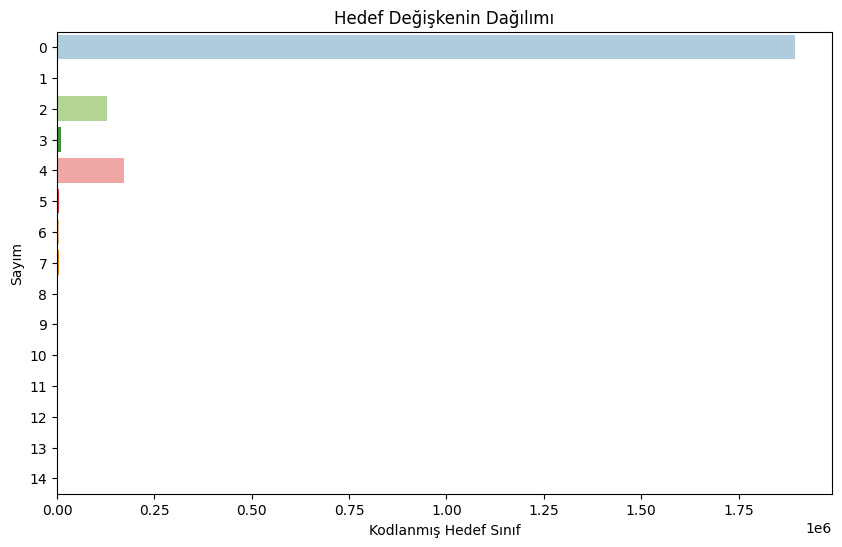

Sınıf 0  oran: 84.9229%
Sınıf 4  oran: 7.7447%
Sınıf 2  oran: 5.7359%
Sınıf 3  oran: 0.4609%
Sınıf 7  oran: 0.2657%
Sınıf 6  oran: 0.2413%
Sınıf 5  oran: 0.2342%
Sınıf 11 oran: 0.1442%
Sınıf 10 oran: 0.0876%
Sınıf 12 oran: 0.0659%
Sınıf 1  oran: 0.0644%
Sınıf 14 oran: 0.0292%
Sınıf 9  oran: 0.0016%
Sınıf 13 oran: 0.0009%
Sınıf 8  oran: 0.0005%


In [30]:
# veri kümesindeki dengesizliği görselleştirir.
# yukarıdaki çıktıda veri kümesinde sınıf dengesizliği var.

# 10 inç x 6 inç figür oluşturur.
plt.figure(figsize=(10, 6))

# seaborn kütüphanesini kullanarak hedef değişkenin y sayısal değerlerine göre bir çubuk grafik oluştuduk. Ve farklı sınıflara farklı renkler atadık
sns.countplot(y=y, palette='Paired')
plt.title('Hedef Değişkenin Dağılımı')
plt.xlabel('Kodlanmış Hedef Sınıf')
plt.ylabel('Sayım')
plt.show()

# Her bir sınıfın sayısını ve oranını hesaplar.
class_counts = y.value_counts()
class_ratios = class_counts / len(y)

# Her sınıfın oranını yazdırırr.
# sınıf etiketi 10'dan küçükse, etiket ve oranın daha fazla ondalık basamaklı olarak yazdırılmasını sağlar.
# 10'dan büyükse, etiket ve oranın daha az ondalık basamaklı olarak yazdırır.
for label, ratio in class_ratios.items():
    if label < 10:
        print(f"Sınıf {label}  oran: {ratio*100:.4f}%")
    else:
        print(f"Sınıf {label} oran: {ratio*100:.4f}%")
        

In [31]:

#Çok sınıflı yapılandırma altında 75-10-15 (%)

X_train, X_val, X_test, y_train, y_val, y_test = extractAllSets(X, y, 0.75, 0.10, 0.15)  #verileri %75 eğitim, %10 doğrulama, %15 test setlerine ayırıyoruz

# Tüm setleri liste biçiminde düzenleme
original_data = [X_train, X_val, X_test, y_train, y_val, y_test] # ayrılan veriler liste halinde sakla

In [32]:
# Data Scaling (Veri Ölçekleme)

# verileri tekdüze dağılımla başlatın
quantile_transformer = QuantileTransformer(n_quantiles=10**4, output_distribution='uniform')

# Eğitim verilerini sığdırıp ve dönüştür
X_train_transformed = quantile_transformer.fit_transform(X_train)

# Aynı dönüştürücüyü kullanarak doğrulama ve test verilerini dönüştürün
X_val_transformed  = quantile_transformer.transform(X_val)
X_test_transformed = quantile_transformer.transform(X_test)

# Dönüştürülmüş verileri liste olarak düzenleyin
scaled_data = [X_train_transformed, X_val_transformed, X_test_transformed, y_train, y_val, y_test]

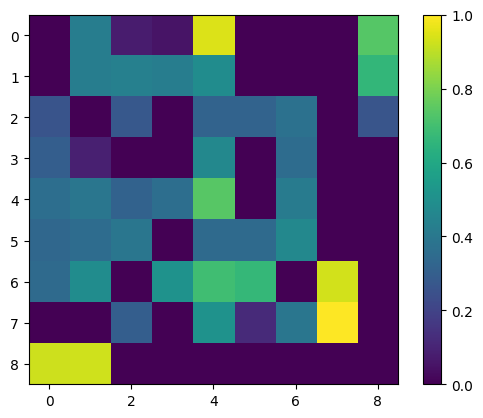

In [33]:


# Gri tonlamalı görüntülere dönüştürme

# Tab2Img modelini tanımlayın
model_tab2img = Tab2Img() # tablo verisini görüntüye dönüştürüyor


# Eğitim verilerini dönüştürün
X_train_images = model_tab2img.fit_transform(X_train_transformed, y_train.values) #Tablo verisini (9x9) numpy dizisine dönüştürür

# Doğrulama ve test verilerini dönüştürün (uygun modeli kullanarak)
X_val_images  = model_tab2img.transform(X_val_transformed)
X_test_images = model_tab2img.transform(X_test_transformed) #Doğrulama ve test verilerini (9x9) numpy dizilerine dönüştürür


# Gri Tonlama Dönüşümü - CNN girişi için görüntü verilerini yeniden şekillendirin
X_train_images = X_train_images.reshape(-1, 9, 9, 1)
X_val_images   = X_val_images.reshape(  -1, 9, 9, 1)
X_test_images  = X_test_images.reshape( -1, 9, 9, 1) #(9x9) dizilerini (9x9x1) gri tonlamalı görüntülere dönüştürür

# Bir örneği görselleştirin
plt.imshow(X_train_images[0])
plt.colorbar()
plt.show() # İlk eğitim verisi örneğini görüntüle.

In [34]:

# Model mimarisini tanımlayın

# Başlatıcıların Tanımlanması
conv_initializer   = HeNormal(seed=seed_pi) # konvolüsyon katmanlarının ağırlıklarını başlatmak için HeNormal başlatıcısı kullanıyoruz.
dense_initializer  = HeUniform(seed=seed_pi) # yoğun (Dense) katmanların ağırlıklarını başlatmak için HeUniform başlatıcısını kullanıyoruz. 
output_initializer = GlorotUniform(seed=seed_pi) # çıktı katmanının ağırlıklarını başlatmak için GlorotUniform başlatıcısını kullanır.

# Çıktı katmanının ayarlanması
num_classes = len(class_counts) # modelin son katmanındaki sınıf (nöron) sayısını belirler

#modelin tanımlanması
model_1 = Sequential([ #Katmanları sırayla ekler
    Input(shape=(9, 9, 1)), #modelin girdi katmanını tanımlar. 9x9 boyutunda 1 girdili(gri tonlamalı) görüntü
    Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer=conv_initializer), #32 filtreli, 3x3 konvolüsyon katmanı, ReLU aktivasyonu
    MaxPooling2D(pool_size=(2, 2)), #2x2 havuzlama katmanı
    Flatten(), #girdiyi düzleştiriyor
    Dense(128, activation='relu', kernel_initializer=dense_initializer), #128 nöronlu yoğun katman, ReLU aktivasyonu
    Dense(num_classes, activation='softmax', kernel_initializer=output_initializer) # sınıf sayısı kadar nöron, softmax aktivasyonu.
])

# Model özetini yazdırma
model_1.summary() # katmanları ve parametreleri özetler

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 32)       │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,247 (153.31 KB)

 Trainable params: 39,247 (153.31 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# Öğrenme Oranı Sceduler ve Derleme


# ReduceLROnPlateau zamanlayıcısını tanımlanması, LR:Öğrenme Oranı
reduce_lr = ReduceLROnPlateau( 
    monitor='val_accuracy',    # doğrulama doğruluğunu izler. Eğer doğrulama doğruluğu gelişmezse, öğrenme oranını düşürür.
    patience= 5,               # modelin doğrulama doğruluğu gelişmeden önce kaç epoch boyunca beklemesi gerektiğini belirtir.
    min_lr= 1e-07,             #  Minimum öğrenme oranı (deafault değeri=0.0001)
    verbose=1,                 # Öğrenme oranı düşürüldüğünde ayrıntılı çıktı sağlar
    factor= 0.1)               # Öğrenme oranını, doğrulama doğruluğu gelişmediğinde, belirlenen faktörle çarparak azaltır.   

# 
model_1.compile(optimizer='adam', #  Adam optimizasyon algoritması kullanılarak modeli optimize eder.
                loss='sparse_categorical_crossentropy', # Kayıp fonksiyonu olarak seyrek kategorik çapraz entropi kullanılır.
                metrics=['accuracy']) # Modelin performansını ölçmek için doğruluk metriğini kullanır.

*Batch size: 1024 is optimal!*

In [36]:
#Modeli eğitim verileri üzerinde eğitmek.

#X_train_images ve y_train: Eğitim verisi ve etiketler.
#validation_data=(X_val_images, y_val): Doğrulama verisi ve etiketler.
#epochs=100: 100 epoch boyunca eğitim yapacak.
#batch_size=1024: Her adımda 1024 örnek kullanılacak.
#callbacks=[reduce_lr]: Öğrenme hızını dinamik olarak ayarlayan callback.
history_1  = model_1.fit(X_train_images, y_train, validation_data=(X_val_images, y_val), epochs=50, 
    batch_size=1024, callbacks=[reduce_lr])

Epoch 1/50
1635/1635 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9566 - loss: 0.1782 - val_accuracy: 0.9937 - val_loss: 0.0262 - learning_rate: 0.0010
Epoch 2/50
1635/1635 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9944 - loss: 0.0226 - val_accuracy: 0.9948 - val_loss: 0.0193 - learning_rate: 0.0010
Epoch 3/50
1635/1635 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9954 - loss: 0.0174 - val_accuracy: 0.9957 - val_loss: 0.0161 - learning_rate: 0.0010
Epoch 4/50
1635/1635 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9960 - loss: 0.0146 - val_accuracy: 0.9961 - val_loss: 0.0139 - learning_rate: 0.0010
Epoch 5/50
1635/1635 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9965 - loss: 0.0128 - val_accuracy: 0.9965 - val_loss: 0.0126 - learning_rate: 0.0010
Epoch 6/50
1635/1635 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9967 - loss: 0.0116 - val_accuracy: 0.9968 - val_loss: 0.0113 - learning_rate: 0.0010
Epoch 7/50
1635/1635 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.99

In [37]:
# Modelin performansını test verileri üzerinde değerlendirmek.

#X_test_images ve y_test: Test verisi ve etiketler.
#model_1.evaluate(): Modelin test kaybı ve doğruluğunu hesaplar.
test_loss, test_accuracy = model_1.evaluate(X_test_images, y_test)

# Test kümesi üzerinde tahminlerde bulurn
y_pred = model_1.predict(X_test_images)

# Tahmin edilen olasılıkları sınıf etiketlerine dönüştürür
y_pred_labels = np.argmax(y_pred, axis=1) #En yüksek olasılığa sahip sınıf etiketini belirler.

# Modelin performans metriklerini hesaplar
precision = precision_score(y_test, y_pred_labels, average='weighted', zero_division=1) # Kesinlik, geri çağırma ve F1 skoru hesaplamaları.
recall    = recall_score(y_test, y_pred_labels, average='weighted', zero_division=1) # Ağırlıklı ortalama kullanarak hesaplama yapılır.
f1        = f1_score(y_test, y_pred_labels, average='weighted', zero_division=1) # Sıfır bölme hatalarını önler.

# Modelin performans metriklerini yazdırmak
print(f"Test Kaybı:      {test_loss:.4f}")
print(f"Test Doğruluk:  {test_accuracy*100:.2f}%")
print(f"Test Hassasiyet: {precision*100:.2f}%")
print(f"Test Geri Çağırma:    {recall*100:.2f}%")
print(f"Test F1 Skoru:  {f1*100:.2f}%")


10462/10462 ━━━━━━━━━━━━━━━━━━━━ 10s 922us/step - accuracy: 0.9980 - loss: 0.0065
10462/10462 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step
Test Kaybı:      0.0064
Test Doğruluk:  99.79%
Test Hassasiyet: 99.80%
Test Geri Çağırma:    99.79%
Test F1 Skoru:  99.78%


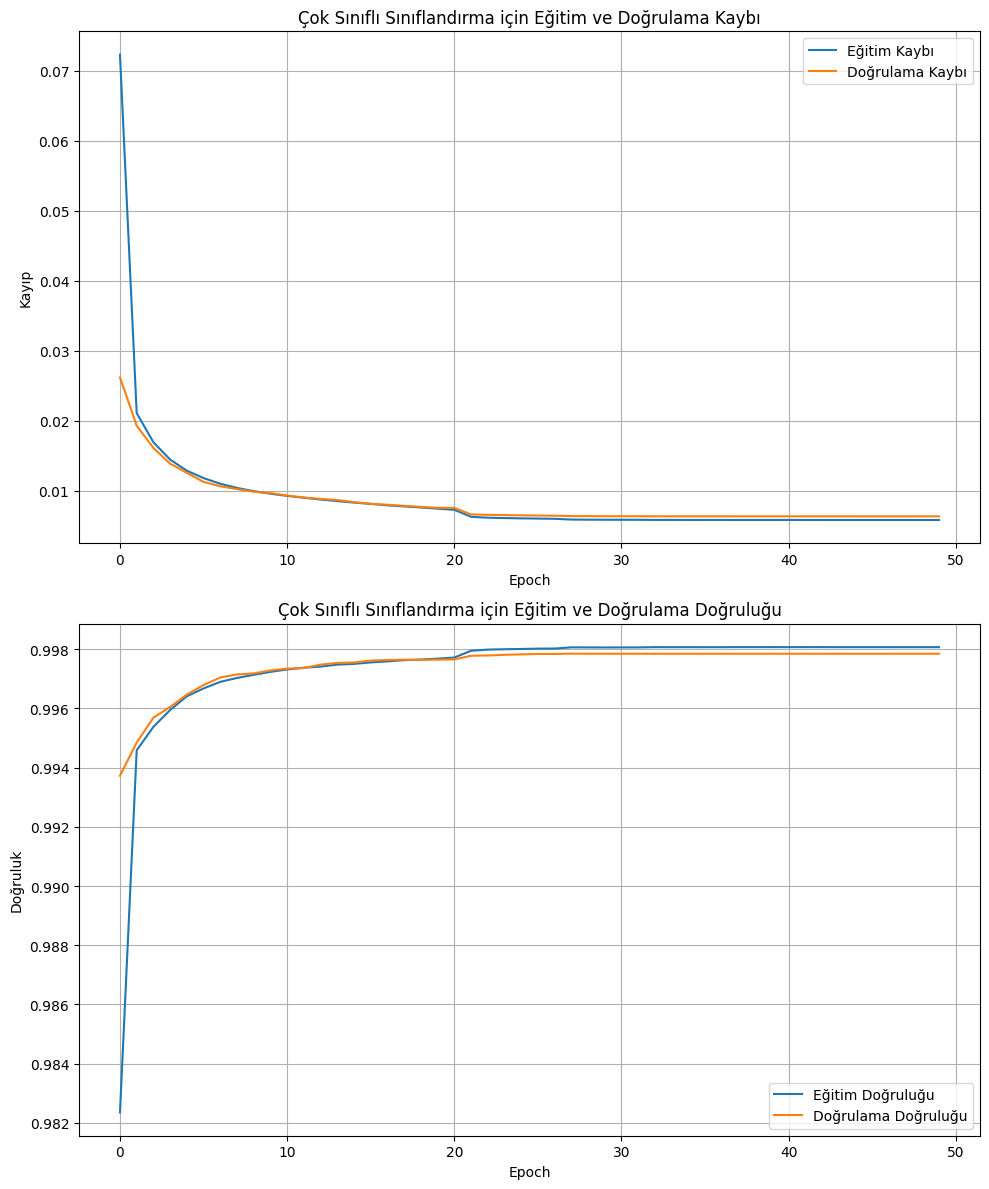

In [38]:
# Eğitim ve doğrulama kayıplarını/doğruluklarını görselleştirmek için geçmiş verileri çıkarmak.
train_loss = history_1.history['loss']
val_loss   = history_1.history['val_loss']
train_acc  = history_1.history['accuracy']
val_acc    = history_1.history['val_accuracy']

# Eğitim ve doğrulama kaybı eğrilerini çizmek.
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

ax1.plot(range(len(train_loss)), train_loss, label='Eğitim Kaybı')
ax1.plot(range(len(val_loss)),   val_loss,   label='Doğrulama Kaybı')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Kayıp')
ax1.set_title('Çok Sınıflı Sınıflandırma için Eğitim ve Doğrulama Kaybı')
ax1.legend()
ax1.grid(True)

# Eğitim ve doğrulama doğruluğu eğrilerini çizmek.
ax2.plot(range(len(train_acc)), train_acc, label='Eğitim Doğruluğu')
ax2.plot(range(len(val_acc)),   val_acc,   label='Doğrulama Doğruluğu')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Doğruluk')
ax2.set_title('Çok Sınıflı Sınıflandırma için Eğitim ve Doğrulama Doğruluğu')
ax2.legend()
ax2.grid(True)

# Grafiklerin Düzeni ayarlar
plt.tight_layout()

# Graqfiklerin Çizimini görüntüler
plt.show()